In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pickle
import glob

In [2]:
RESULTS_DIR = './artifacts/model_training/cv_results/'
CLASS_LABELS = ['W', 'N1', 'N2', 'N3', 'R']

# 1. Global accuracy

In [3]:
def get_avg_accuracy(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Get average accuracy
    accuracies = []
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            accuracies.append(pickle.load(f)['accuracy'])
    
    fig = plt.figure(figsize=(12,7))
    plt.scatter(
        [model_type]*len(accuracies),
        accuracies,
        marker='X',
        label='folds'
    )
    plt.scatter(
        [model_type],
        [np.mean(accuracies)],
        marker='o',
        color='red',
        label='avg: {}%'.format(
            round(100*np.mean(accuracies), 2)
        ),
        s=100
    )
    plt.title('Accuracies for model type: {}'.format(model_type))
    plt.legend()

## a. Full

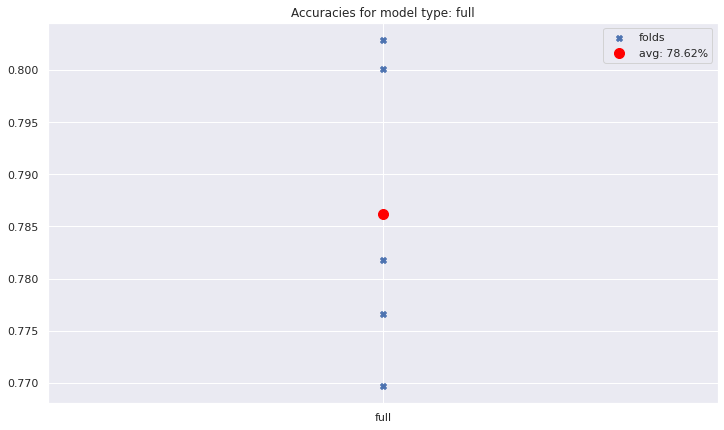

In [4]:
MODEL_TYPE = 'full'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

## b. Feats

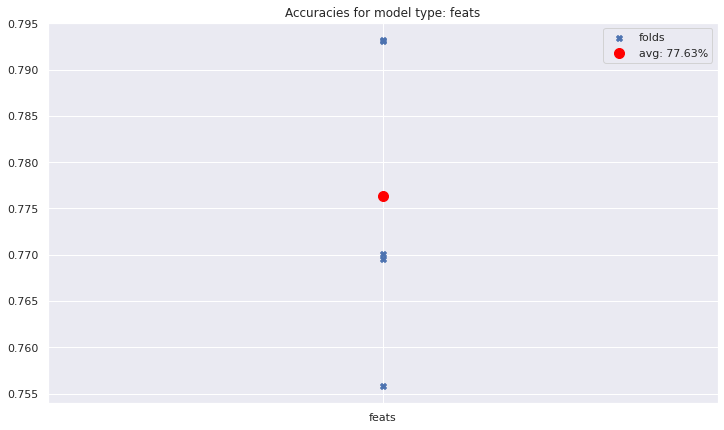

In [5]:
MODEL_TYPE = 'feats'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

## c. Raw

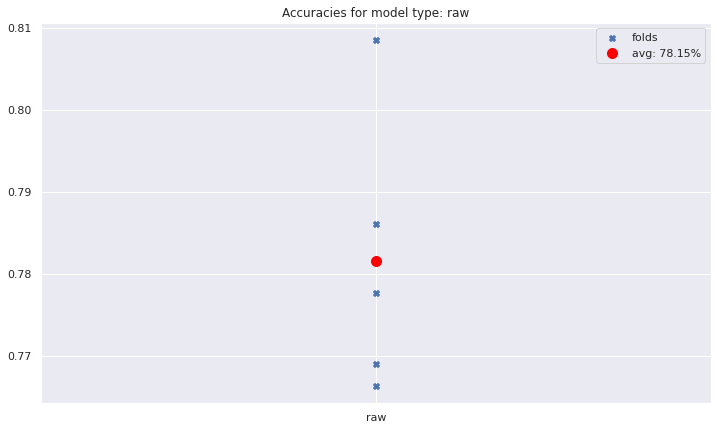

In [6]:
MODEL_TYPE = 'raw'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

# 2. Training times

In [7]:
def get_training_times(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Get average accuracy
    train_times = []
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            train_times.append(pickle.load(f)['training_time']//60)
    
    fig = plt.figure(figsize=(12,7))
    plt.scatter(
        [model_type]*len(train_times),
        train_times,
        marker='X',
        label='folds'
    )
    plt.scatter(
        [model_type],
        [np.mean(train_times)],
        marker='o',
        color='red',
        label='avg: {} minutes'.format(np.mean(train_times)),
        s=100
    )
    plt.title('Training times for model type: {}'.format(model_type))
    plt.legend()
    
    

## a. Full

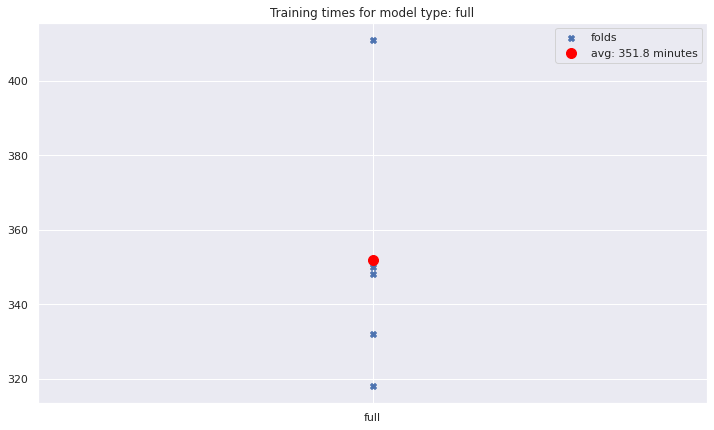

In [8]:
MODEL_TYPE='full'
get_training_times(MODEL_TYPE)

## b. Feats

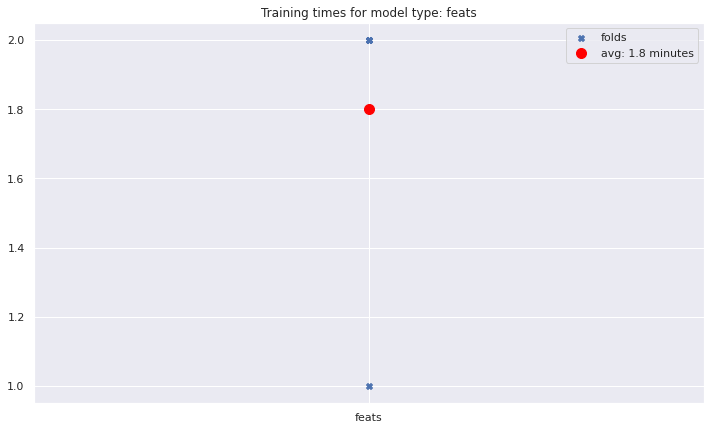

In [9]:
MODEL_TYPE='feats'
get_training_times(MODEL_TYPE)

## c. Raw

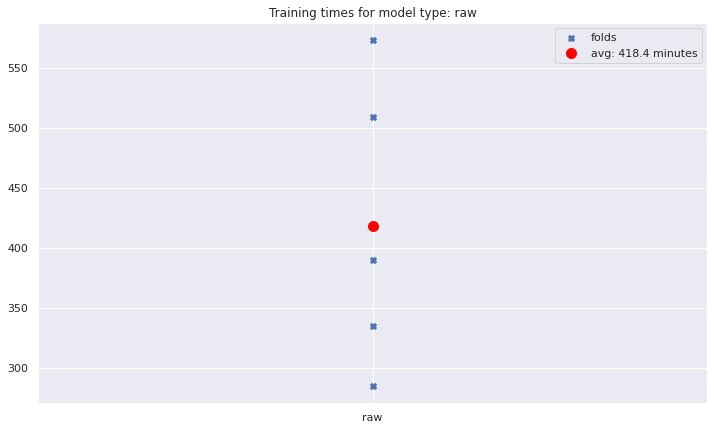

In [10]:
MODEL_TYPE='raw'
get_training_times(MODEL_TYPE)

# 3. Total confusion matrices

In [11]:
def get_total_confusion(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Initialize confusion matrix
    confusion_matrix = pd.DataFrame(
        index=CLASS_LABELS,
        columns=CLASS_LABELS,
        data=np.zeros((len(CLASS_LABELS), len(CLASS_LABELS)))
    )
    
    # Get avg confusion matrix
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            confusion_matrix = confusion_matrix + pickle.load(f)['confusion_matrix']
    
    # Get avg confusion matrix scaled by true samples
    confusion_matrix_scaled = confusion_matrix.divide(
        confusion_matrix.sum(axis=1),
        axis='rows'
    )
    
    return confusion_matrix, confusion_matrix_scaled
    

## a. Full

In [12]:
MODEL_TYPE = 'full'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [13]:
confusion

,W,N1,N2,N3,R
W,70304.0,2763.0,659.0,54.0,2369.0
N1,1643.0,6079.0,9008.0,118.0,4674.0
N2,511.0,2028.0,60209.0,2862.0,3522.0
N3,15.0,25.0,5105.0,7859.0,35.0
R,820.0,2265.0,5468.0,72.0,17210.0


In [14]:
confusion_scaled

,W,N1,N2,N3,R
W,0.923243,0.036284,0.008654,0.000709,0.031110
N1,0.076340,0.282455,0.418548,0.005483,0.217173
N2,0.007392,0.029335,0.870928,0.041399,0.050946
N3,0.001150,0.001917,0.391518,0.602730,0.002684
R,0.031740,0.087672,0.211651,0.002787,0.666151


## b. Feats

In [15]:
MODEL_TYPE = 'feats'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [16]:
confusion

,W,N1,N2,N3,R
W,70621.0,2340.0,926.0,43.0,2219.0
N1,2614.0,5744.0,8436.0,98.0,4630.0
N2,1213.0,1872.0,59457.0,2488.0,4102.0
N3,326.0,63.0,5695.0,6759.0,196.0
R,1221.0,2093.0,5464.0,19.0,17038.0


In [17]:
confusion_scaled

,W,N1,N2,N3,R
W,0.927405,0.030729,0.012160,0.000565,0.029140
N1,0.121457,0.266890,0.391971,0.004553,0.215129
N2,0.017546,0.027079,0.860050,0.035989,0.059336
N3,0.025002,0.004832,0.436767,0.518368,0.015032
R,0.047261,0.081014,0.211496,0.000735,0.659493


## c. Raw

In [18]:
MODEL_TYPE = 'raw'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [19]:
confusion

,W,N1,N2,N3,R
W,71069.0,2480.0,540.0,26.0,2034.0
N1,2183.0,6054.0,7888.0,79.0,5318.0
N2,946.0,2546.0,59519.0,2143.0,3978.0
N3,101.0,18.0,5083.0,7765.0,72.0
R,1274.0,2753.0,5507.0,21.0,16280.0


In [20]:
confusion_scaled

,W,N1,N2,N3,R
W,0.933289,0.032568,0.007091,0.000341,0.026711
N1,0.101431,0.281294,0.366509,0.003671,0.247096
N2,0.013684,0.036828,0.860947,0.030999,0.057542
N3,0.007746,0.001380,0.389831,0.595521,0.005522
R,0.049313,0.106561,0.213160,0.000813,0.630153


# 4. Per-class precision, recall and F1

In [21]:
def get_avg_class_metrics(model_type):
    
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')

    # Initialize confusion matrix

    # Initialize dfs for holding class values
    class_metrics = pd.DataFrame(
        index=list(range(len(CLASS_LABELS))),
        data={
            'class': CLASS_LABELS
        }
    )
    class_values = pd.DataFrame(
        index=list(range(len(CLASS_LABELS))),
        columns=['precision', 'recall', 'f1'],
        data=np.zeros((len(CLASS_LABELS), 3))
    )
    
    # Get avg value for precision, recall and f1 along folds
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            class_values = class_values + pickle.load(f)['class_metrics'].drop(columns='class')
    class_values = class_values/len(performance_filepaths)
    class_metrics = pd.concat(
        [
            class_metrics,
            class_values
        ],
        axis=1
    )
    
    return class_metrics

## a. Full

In [22]:
MODEL_TYPE='full'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.959618,0.923531,0.940841
1,N1,0.472414,0.288080,0.349035
2,N2,0.753883,0.872283,0.805002
3,N3,0.770042,0.596061,0.631149
4,R,0.628390,0.666615,0.639009


## b. Feats

In [23]:
MODEL_TYPE='feats'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.929647,0.927606,0.928516
1,N1,0.476845,0.270911,0.342228
2,N2,0.747622,0.861253,0.797885
3,N3,0.737544,0.514296,0.586334
4,R,0.606645,0.660776,0.629232


## c. Raw

In [24]:
MODEL_TYPE='raw'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.941780,0.933120,0.937117
1,N1,0.443211,0.287311,0.340821
2,N2,0.760220,0.862286,0.806660
3,N3,0.794502,0.591853,0.649084
4,R,0.587735,0.630454,0.607638


# 5. Training history

In [25]:
def get_training_history(model_type):
    
    # Get filepaths for performance files
    history_filepaths = glob.glob(RESULTS_DIR+model_type+'/history*')

    # Initialize confusion matrix

    # Get avg value for precision, recall and f1 along folds
    training_history = pd.DataFrame()
    for history_f in history_filepaths:
        training_history = pd.concat(
            [
                training_history,
                pd.read_csv(history_f)
            ],
            axis=0
        ).sort_values(
            by=['fold', 'epoch'],
            ascending=True
        ).reset_index(
            drop=True
        )
    
    fig, (ax1, ax2) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(25,15)
    )
    
    # Ax1
    sns.lineplot(
        data=training_history,
        x='epoch',
        y='categorical_accuracy',
        hue='fold',
        ax=ax1
    )
    ax1.set_title('Train')
    
    # Ax2
    sns.lineplot(
        data=training_history,
        x='epoch',
        y='val_categorical_accuracy',
        hue='fold',
        ax=ax2
    )
    ax2.set_title('Valid')

## a. Full

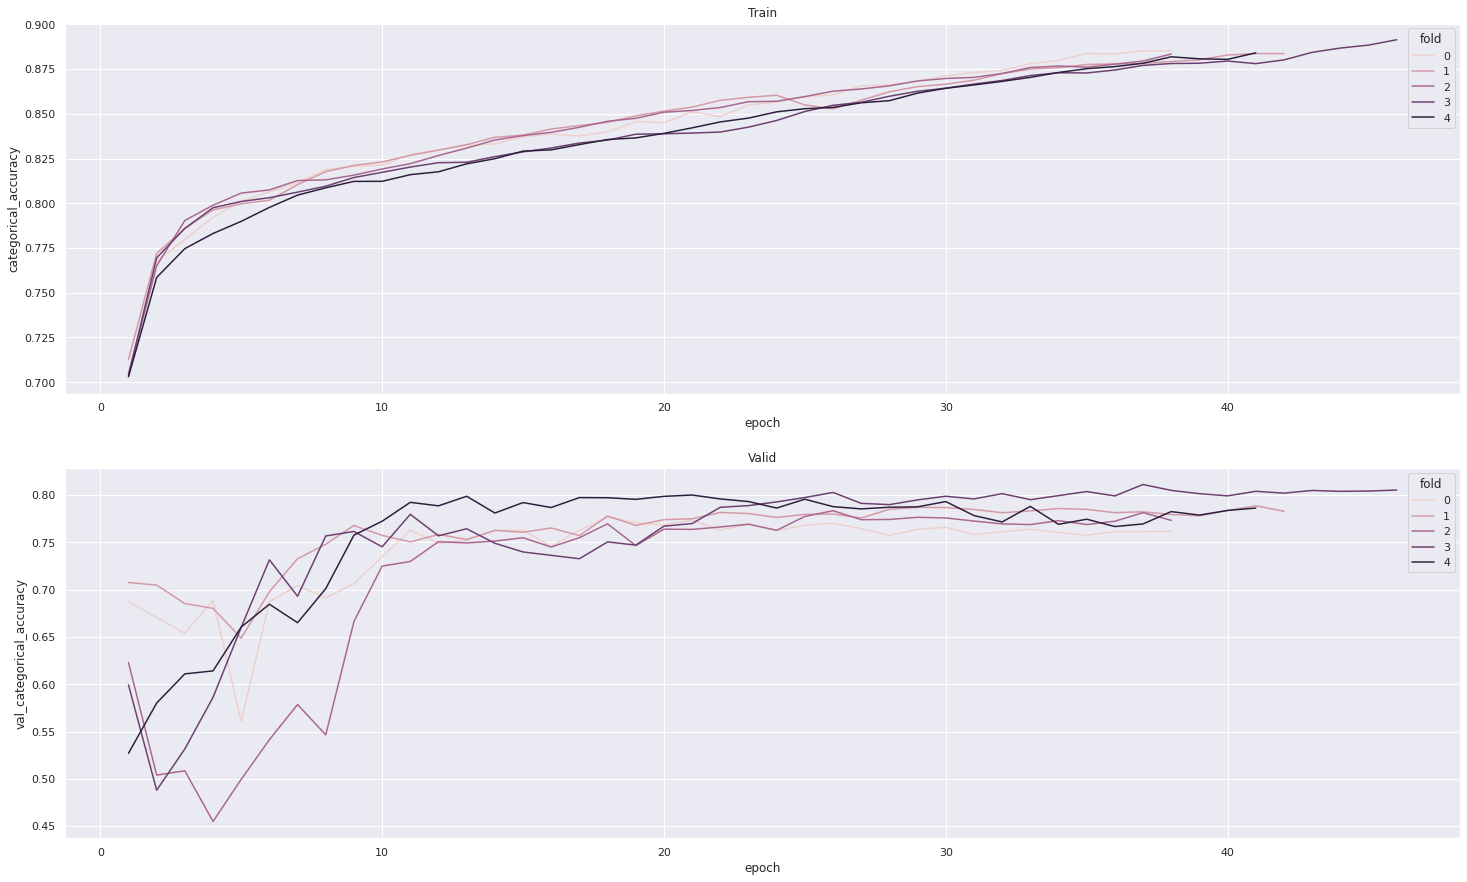

In [26]:
get_training_history('full')

## b. Feats

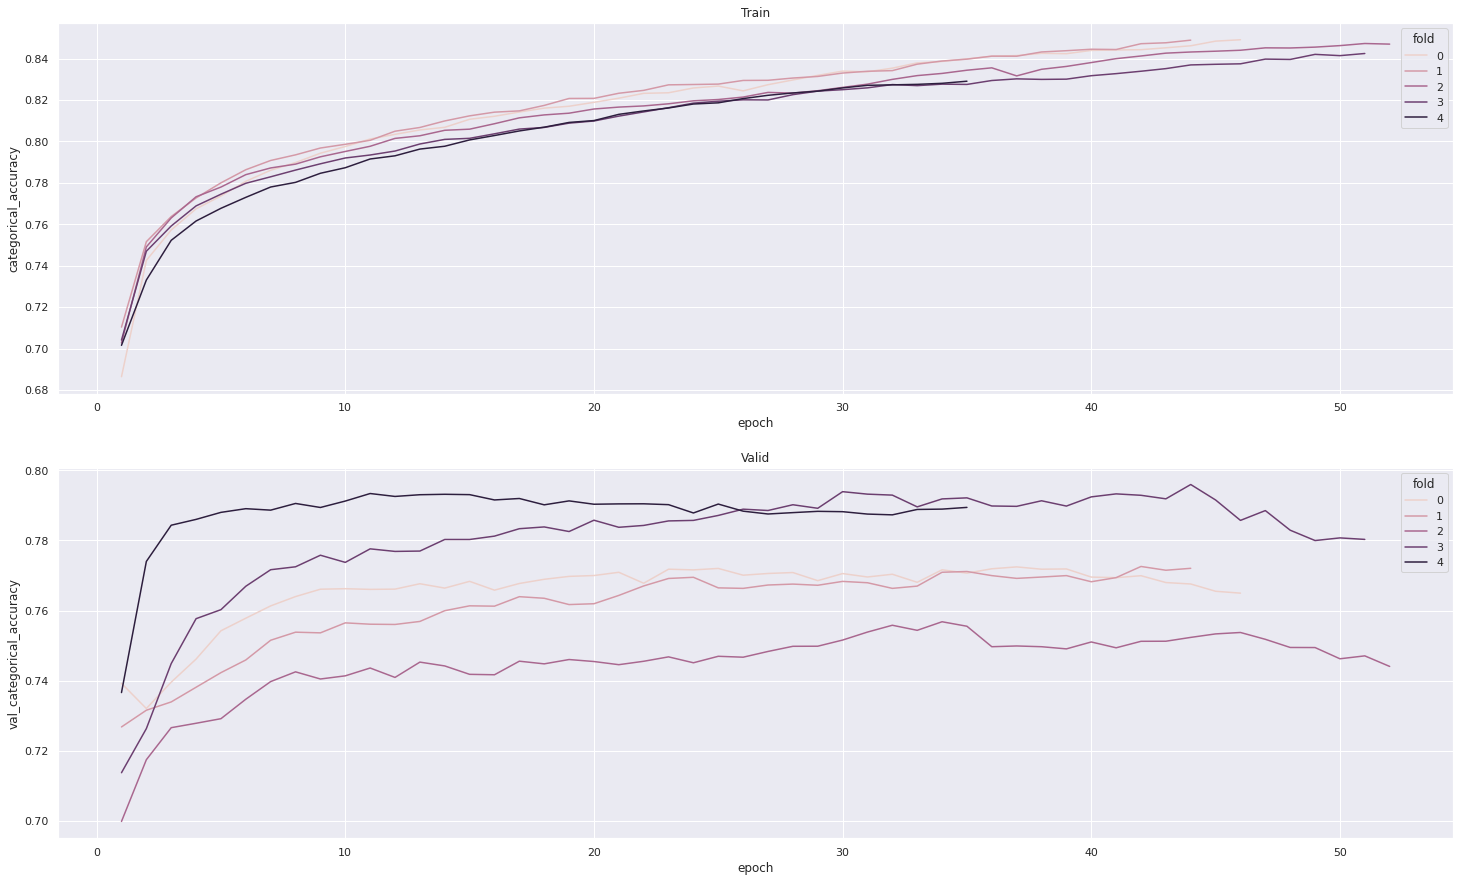

In [27]:
get_training_history('feats')

## c. Raw

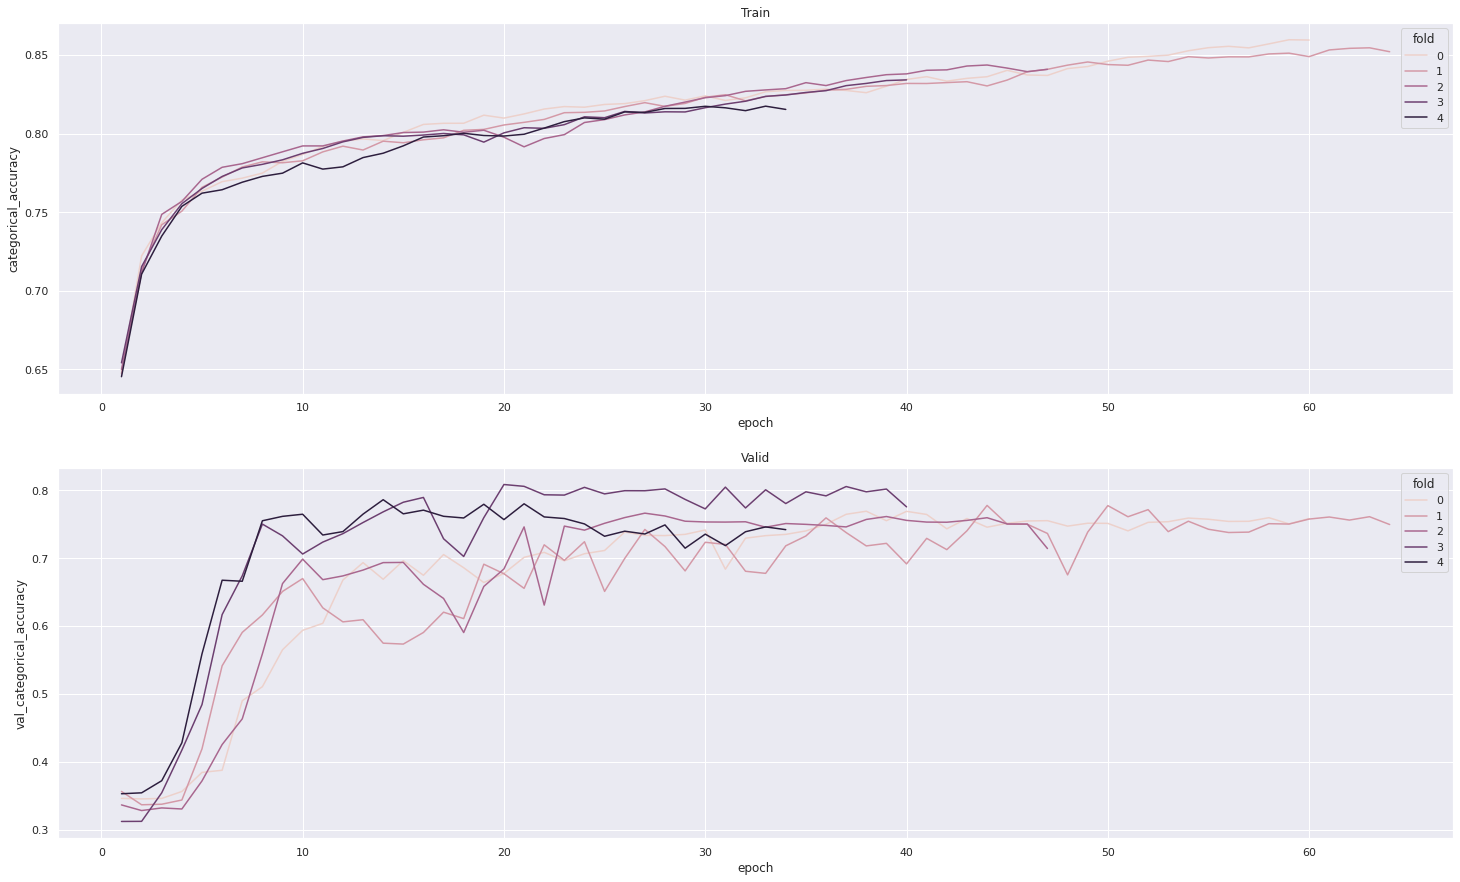

In [28]:
get_training_history('raw')